# 선행 연구들 기반으로 단어 리스트별 상관 분석해보기

## Baek et al.(2023)
Proficiency versus lexical processing efficiency as a measure of L2
lexical quality: Individual differences in word‑frequency effects in L2
visual word recognition

In [276]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [306]:
HF_df = pd.DataFrame(
    {
        'Word': ['right', 'think', 'never', 'sorry', 'thank', 'love', 'maybe', 'help', 'these', 'night', 'first', 'great', 'life', 'still', 'those', 'other', 'stop', 'name', 'money', 'place', 'kind', 'hello', 'years', 'leave', 'girl', 'three', 'wrong', 'might', 'house', 'baby'],
        'L1_Freq': [5.31, 5.14, 4.84, 4.78, 4.76, 4.76, 4.67, 4.67, 4.66, 4.65, 4.63, 4.62, 4.61, 4.60, 4.58, 4.57, 4.56, 4.52, 4.51, 4.49, 4.48, 4.48, 4.46, 4.46, 4.45, 4.44, 4.43, 4.42, 4.42, 4.42],
    }
)
HF_df.describe()

,L1_Freq
count,30.000000
mean,4.613000
std,0.205177
min,4.420000
25%,4.465000
50%,4.575000
75%,4.667500
max,5.310000


In [307]:
LF_df = pd.DataFrame(
    {
        'Word': ['skirt', 'creek', 'laser', 'stove', 'chili', 
                 'armor', 'draft', 'jelly', 'shelf', 'hobby', 
                 'tubes', 'peach', 'booty', 'cloth', 'debts', 
                 'glue', 'spine', 'clip', 'tomb', 'scope', 
                 'dove', 'vest', 'lone', 'buyer', 'mode', 
                 'waist', 'thorn', 'flick', 'hound', 'crow'],
        'L1_Freq': [2.71, 2.66, 2.64, 2.59, 2.58, 
                    2.57, 2.57, 2.56, 2.55, 2.55, 
                    2.53, 2.51, 2.50, 2.49, 2.49, 
                    2.48, 2.47, 2.46, 2.46, 2.46, 
                    2.46, 2.46, 2.43, 2.42, 2.42, 
                    2.42, 2.42, 2.41, 2.41, 2.36],
    }
)
LF_df.describe()

,L1_Freq
count,30.000000
mean,2.501333
std,0.082827
min,2.360000
25%,2.437500
50%,2.485000
75%,2.557500
max,2.710000


In [265]:
CSAT_lexicon_proj_file_path = os.path.join(os.path.dirname(os.path.dirname(Path.cwd())), 'Corpora', 'merged_corpora', 'CSAT_E_lexicon.xlsx')

In [308]:
df = pd.read_excel(CSAT_lexicon_proj_file_path)
df

,Word,Length,CSAT_Freq,CSAT_only_Freq,Textbook_only_Freq,Freq_HAL,SUBTLWF,CSAT_RFreq,CSAT_only_RFreq,Textbook_only_RFreq,Ortho_N_CSAT,Ortho_N_CSAT(only),Ortho_N_Textbook(only),Ortho_N,OLD20_CSAT,OLD20_CSAT(only),OLD20_Textbook(only),OLD,SUBTLCD,POS
0,a,1,17505.0,9773.0,7732.0,10610626,20415.27,0.017505,0.009773,0.007732,1.0,1.0,1.0,1,1.45,1.45,1.45,1.45,99.93,minor|NN
1,aah,3,NaN,NaN,NaN,222,52.71,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,1.85,7.56,NaN
2,aaron,5,7.0,1.0,6.0,10806,14.65,0.000007,0.000001,0.000006,1.0,1.0,0.0,3,1.85,1.95,2.00,1.85,1.93,NN
3,aback,5,NaN,NaN,NaN,387,0.29,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1.95,0.18,RB
4,abacus,6,NaN,NaN,NaN,513,0.24,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,2.90,0.12,NN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40476,zoom,4,NaN,NaN,NaN,4920,3.55,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,1.70,1.29,VB|NN
40477,zooming,7,NaN,NaN,NaN,523,0.63,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,1.85,0.31,VB
40478,zooms,5,NaN,NaN,NaN,385,0.06,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,1.80,0.04,VB
40479,zucchini,8,NaN,NaN,NaN,314,0.96,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,3.75,0.25,NN


In [320]:
def plot(df0: pd.DataFrame, df1: pd.DataFrame, df2: pd.DataFrame):
    sample_df = pd.merge(df0, df1, how='inner', on='Word')[['Word', 'SUBTLWF', 'CSAT_Freq', 'Freq_HAL']]
    sample_df['Freq_type'] = 'HF'
    sample2_df = pd.merge(df0, df2, how='inner', on='Word')[['Word', 'SUBTLWF', 'CSAT_Freq', 'Freq_HAL']]
    sample2_df['Freq_type'] = 'LF'
    sample_df = pd.concat([sample_df, sample2_df], ignore_index=True)
    target_col = ['SUBTLWF', 'CSAT_Freq', 'Freq_HAL']
    sample_df[target_col] = sample_df[target_col].apply(lambda x: stats.zscore(x, nan_policy='omit'))
    #sample_df['CSAT_Freq'] = sample_df['CSAT_Freq'] / (800000.0) # 상대빈도수 scaling 전체 코퍼스 대비 빈도수로 변환.
    #sample_df['Freq_HAL'] = sample_df['Freq_HAL'] / (130000000.0) # 상대빈도수 scaling 전체 코퍼스 대비 빈도수로 변환.
    #sample_df['SUBTLWF'] = sample_df['SUBTLWF'] / (51.0) # 상대빈도수 scaling 전체 코퍼스 대비 빈도수로 변환.
    sample_df = sample_df.melt(id_vars=['Word', 'Freq_type'], var_name='Corpus', value_name='Freq')
    print(sample_df.describe())
    plt.figure(figsize=(5, 8))
    plt.ylim(-1.5, 4)
    sns.boxplot(sample_df, x='Freq_type', y='Freq', hue='Corpus')

               Freq
count  1.760000e+02
mean   2.018587e-17
std    1.002853e+00
min   -7.550540e-01
25%   -6.819339e-01
50%   -5.000683e-01
75%    3.980157e-01
max    5.220737e+00


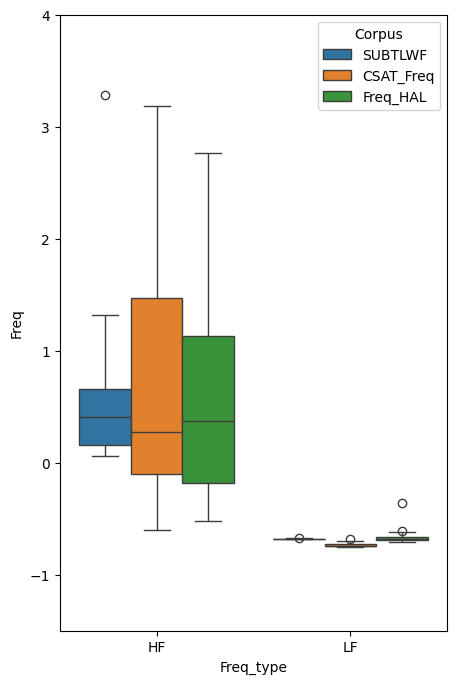

In [321]:
plot(df, HF_df, LF_df)

In [ ]:
sample_df = pd.merge(df, HF_df, how='inner', on='Word')[['Word', 'SUBTLWF', 'CSAT_Freq', 'Freq_HAL']]
sample_df['Freq_type'] = 'HF'
sample_df

,Word,SUBTLWF,CSAT_Freq,Freq_HAL,Freq_type
0,baby,509.37,57.0,35810,HF
1,first,840.57,1041.0,518924,HF
2,girl,557.12,91.0,40340,HF
3,great,820.86,881.0,260267,HF
4,hello,585.43,290.0,41649,HF
5,help,921.12,925.0,335483,HF
6,house,514.00,320.0,104153,HF
7,kind,590.69,209.0,131849,HF
8,leave,560.71,155.0,76506,HF
9,life,796.65,872.0,219561,HF


In [283]:
sample2_df = pd.merge(df, LF_df, how='inner', on='Word')[['Word', 'SUBTLWF', 'CSAT_Freq', 'Freq_HAL']]
sample2_df['Freq_type'] = 'LF'
sample2_df

,Word,SUBTLWF,CSAT_Freq,Freq_HAL,Freq_type
0,armor,7.29,4.0,13211,LF
1,booty,6.14,NaN,372,LF
2,buyer,5.18,6.0,17902,LF
3,chili,7.49,7.0,1783,LF
4,clip,5.69,17.0,7281,LF
5,cloth,6.10,19.0,11191,LF
6,creek,8.90,4.0,8465,LF
7,crow,4.45,27.0,4667,LF
8,debts,6.10,1.0,2235,LF
9,dove,5.57,2.0,2713,LF


In [284]:
sample_df = pd.concat([sample_df, sample2_df], ignore_index=True)
target_col = ['SUBTLWF', 'CSAT_Freq', 'Freq_HAL']
sample_df[target_col] = sample_df[target_col].apply(lambda x: stats.zscore(x, nan_policy='omit'))
sample_df = sample_df.melt(id_vars=['Word', 'Freq_type'], var_name='Corpus', value_name='Freq')
sample_df

,Word,Freq_type,Corpus,Freq
0,baby,HF,SUBTLWF,0.061419
1,first,HF,SUBTLWF,0.549774
2,girl,HF,SUBTLWF,0.131826
3,great,HF,SUBTLWF,0.520712
4,hello,HF,SUBTLWF,0.173569
...,...,...,...,...
175,thorn,LF,Freq_HAL,-0.686758
176,tomb,LF,Freq_HAL,-0.673734
177,tubes,LF,Freq_HAL,-0.669406
178,vest,LF,Freq_HAL,-0.699989


<Axes: xlabel='Freq_type', ylabel='Freq'>

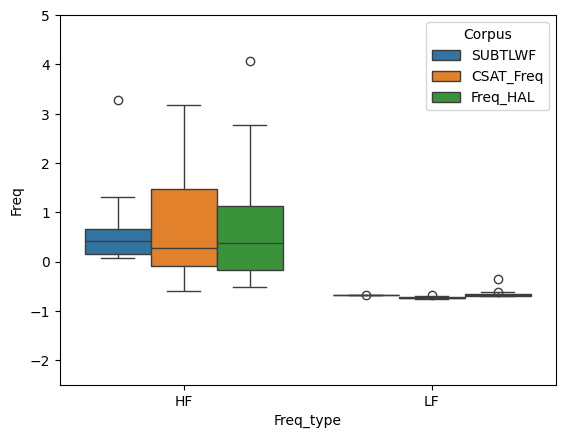

In [286]:
plt.ylim(-2.5, 5)
sns.boxplot(sample_df, x='Freq_type', y='Freq', hue='Corpus')

야 조졌다. 왜 이건 또 상관이 많이 다를까..?

In [91]:
pd.merge(df, HF_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.000000,0.008626
CSAT_Freq,0.008626,1.000000


In [92]:
pd.merge(df, HF_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,-0.055745
CSAT_Freq,-0.055745,1.000000


In [93]:
pd.merge(df, HF_df, how='inner', on='Word')[['Freq_HAL', 'SUBTLWF']].corr()

,Freq_HAL,SUBTLWF
Freq_HAL,1.000000,0.395927
SUBTLWF,0.395927,1.000000


In [94]:
pd.merge(df, LF_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.000000,-0.079579
CSAT_Freq,-0.079579,1.000000


In [275]:
pd.merge(df, LF_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,0.159525
CSAT_Freq,0.159525,1.000000


그렇다면 상관이 높은 것 찾아보자. HAL이나 SUBTLEX랑은 비슷하겠지?

In [273]:
pd.merge(df, LF_df, how='inner', on='Word')[['Freq_HAL', 'SUBTLWF']].corr()

,Freq_HAL,SUBTLWF
Freq_HAL,1.000000,-0.085703
SUBTLWF,-0.085703,1.000000


In [12]:
len(HF_df)

30

SUBTLEX에서 뽑아온게 맞네. 근데 HAL이랑은  왜 이렇게 달라..? 아예 거의 상관이 없다는 수준의 값인데 흠,,

그렇다면 corpus 전체으 상관값이 높더라도 corpus가 비슷하다고 할 수 없다는 걸 시사한다고 볼 수 있겠지.

그렇다면 단순 빈도만으로는 설명할 수 잇는데 한계가 있다고 하고, corpus간의 유사성을 분석하는 기존 선행 연구들을 찾아볼 필요가 있겠네

## Wouter et al. (2008)

The frequency effect in second-language
visual word recognition

In [289]:
HF_df = pd.DataFrame(
    {
        'Word': ['balcony', 'birthrate', 'catacomb', 'ceiling', 'ceremony', 
                 'crystal', 'detour', 'deviation', 'diver', 'enquirer', 
                 'fairness', 'flame', 'font', 'graph', 'lawn', 
                 'liberty', 'melon', 'peanut', 'pirate', 'portion', 
                 'puma', 'salary', 'seaman', 'stair', 'waist'
                 ]
    }
)
HF_df.head()

,Word
0,balcony
1,birthrate
2,catacomb
3,ceiling
4,ceremony


In [290]:
LF_df = pd.DataFrame(
    {
        'Word': ['afternoon', 'council', 'couple', 'court', 'daughter', 
                 'dress', 'floor', 'freedom', 'garden', 'health', 
                 'income', 'industry', 'member', 'morning', 'process', 
                 'promise', 'result', 'river', 'secrertary', 'sign', 
                 'teacher', 'town', 'truth', 'union', 'worker'
                 ]
    }
)
LF_df.head()

,Word
0,afternoon
1,council
2,couple
3,court
4,daughter


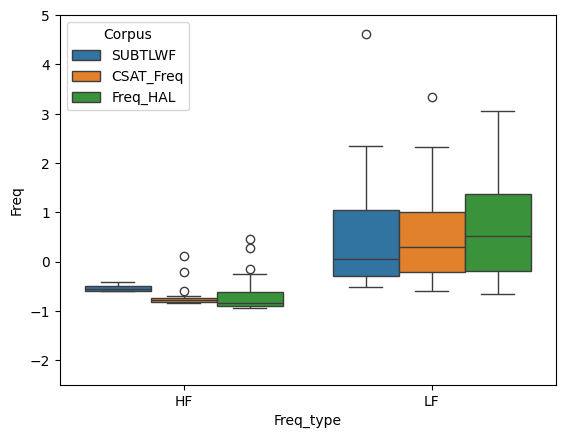

In [291]:
plot(df, HF_df, LF_df)

In [100]:
pd.merge(df, HF_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.000000,0.008626
CSAT_Freq,0.008626,1.000000


In [101]:
pd.merge(df, HF_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,-0.055745
CSAT_Freq,-0.055745,1.000000


In [102]:
pd.merge(df, HF_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,1.000000,0.395927
Freq_HAL,0.395927,1.000000


In [103]:
pd.merge(df, LF_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.00000,0.34681
CSAT_Freq,0.34681,1.00000


In [104]:
pd.merge(df, LF_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,0.256487
CSAT_Freq,0.256487,1.000000


In [105]:
pd.merge(df, LF_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,1.000000,0.032407
Freq_HAL,0.032407,1.000000


앤 또 HAL이랑 비슷하네.

# Xiaocong Chen et al.(2018)

On the predictive validity of various corpus-based frequency norms in L2 English lexical processing

In [106]:
F_df = pd.DataFrame(
    {
        'Word': ['absolute', 'accrue', 'acid', 'admiral', 'affair', 
                 'again', 'agreed', 'allowed', 'amazement', 'american', 
                 'analysis', 'anchor', 'angriest', 'announces', 'another', 
                 'arisen', 'ashes', 'assign', 'atmosphere', 'attempt', 
                 'autonomous', 'available', 'avoid', 'away', 'awkward',
                 'babies', 'balconies', 'bank', 'being', 'best',
                 'bill', 'bleak', 'boast', 'body', 'bombers',
                 'box', 'bravest', 'breed', 'broader', 'bump',
                 'burial', 'bus', 'business', 'buy', 'calmer',
                 'capable', 'capture', 'cart', 'caught', 'characterize',
                 'checks', 'children', 'chosen', 'cigar', 'class',
                 'classified', 'coalition', 'coincide', 'coke', 'combat', 
                 'comes', 'comfy', 'comparison', 'computer', 'conceal', 
                 'conference', 'confession', 'confide', 'confirm', 'conquer', 
                 'consulting', 'contact', 'core', 'corridor', 'corroborate', 
                 'country', 'course', 'covering', 'creation', 'credit', 'crouch', 
                 'cultural', 'curl', 'currently', 'danger', 'day', 'dazzle', 'dealt', 
                 'dearer', 'debut', 'decent', 'declares', 'densest',
                 'development', 'different', 'diminishes', 'diplomat', 'discovery', 
                 'dishes', 'disliked', 'distance', 'distributed', 'division', 'dominant', 'done', 'down',
                 'drawn', 'drives', 'driveway', 'dug', 'during', 'easiest', 'east', 'eaten', 'ecstatic',
                 'edge', 'edifice', 'employer', 'emulation', 'enough', 'entertainment', 'environment', 'episodes', 'excellent', 'excuse', 'experience', 'extracted',
                 'factories', 'fade', 'fancier', 'fans', 'fantastic', 'far', 'fatter', 'fear', 'feet', 'few',
                 'fiercest', 'file', 'fire', 'flagrant', 'flirt', 'fold', 'forced', 'frees', 'fuel', 'fullest',
                 'funniest', 'gathered', 'geese', 'generations', 'gets', 'glasses', 'god', 'gold',
                 'good', 'gospel', 'government', 'gross', 'guys', 'habit', 'happen', 'having',
                 'healthier', 'heard', 'heavy', 'hid', 'highest', 'himself', 'honey', 'hose', 'human', 'hybrid', 'implies', 'incredibly', 'induction', 'information',
                 'installed', 'international', 'island', 'issue', 'its', 'jaunt', 'jewel', 'jingle', 'job',
                 'keep', 'kind', 'knives', 'knowledge', 'known', 'last', 'later', 'latex', 'launch',
                 'leagues', 'lifeboat', 'linking', 'listed', 'loathed', 'looking', 'luckier', 'lumber', 'maintains', 'major', 'manhood', 'manor', 'mean', 'meetings', 'mice',
                 'minister', 'mirror', 'morning', 'mouths', 'move', 'must', 'nastier', 'necessary', 'nerve', 'never', 'nights', 'noisier', 'normal', 'numbers', 'office', 'older',
                 'opportunity', 'orientation', 'outbreak', 'pamper', 'particle', 'patron',
                 'peaches', 'pebble', 'perhaps', 'perimeter', 'periodic', 'picking', 'place',
                 'played', 'pleasure', 'plunging', 'plus', 'possession', 'pound', 'presidential',
                 'prevent', 'probably', 'problems', 'products', 'prototypes',
                 'provides', 'punched', 'purchases', 'purest', 'quarter', 'quieter', 'reasonably', 'received', 'reef', 'relating', 'relationship', 'requires', 'response',
                 'responsible', 'reveal', 'revival', 'ribbon', 'richest', 'right', 'rises', 'roast',
                 'room', 'rough', 'ruler', 'running', 'sadism', 'sat', 'saying', 'second', 'security',
                 'seems', 'selection', 'sentencing', 'separating', 'services', 'session',
                 'shorter', 'shout', 'silence', 'slam', 'slaughter', 'slow', 'sometimes', 'south',
                 'square', 'stakes', 'stamp', 'starting', 'state', 'statistics', 'steady', 'stories',
                 'strain', 'strongest', 'student', 'successor', 'sung', 'surprise', 'surveillance',
                 'tagging', 'taxes', 'tear', 'telescope', 'territories', 'terror', 'textual', 'theme',
                 'thieves', 'those', 'thought', 'tile', 'till', 'today', 'together', 'tolerance', 'torches',
                 'total', 'touchy', 'toxicology', 'tragedies', 'trail', 'transport', 'trouble',
                 'turned', 'twist', 'type', 'uglier', 'uncover', 'under', 'understand', 'universities', 'unless', 'upbringing', 'visitor', 'vocal', 'vulnerable', 'walk', 'wavy',
                 'way', 'weapon', 'weekend', 'weird', 'welcome', 'went', 'wide', 'withhold',
                 'wonder', 'work', 'worn', 'worthiest', 'wound', 'yarn', 'year', 'yes', 'yonder', 'zone',
                 ]
    }
)
len(F_df)

367

In [108]:
pd.merge(df, F_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.000000,0.740225
CSAT_Freq,0.740225,1.000000


In [107]:
pd.merge(df, F_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,0.860003
CSAT_Freq,0.860003,1.000000


In [109]:
pd.merge(df, F_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,1.000000,0.674131
Freq_HAL,0.674131,1.000000


잘 생각해볼 포인트. HAL이랑 SUBTLEX의 크기를 생각해보면 상관이 저렇게 나올 이유가 있을까?

# Shusaku et el.(2022)

Word learning and lexicalization in a second language: Evidence
from the Prime lexicality effect in masked form priming

In [110]:
related_prime_F_df = pd.DataFrame(
    {
        'Word': ['abode', 'aglow', 'bunk', 'colt', 'knack', 
                 'lank', 'mucky', 'omen', 'slant', 'skid', 
                 'stow', 'latch', 'awry', 'bash', 'blob', 
                 'chasm', 'coda', 'fount', 'nigih', 'douse'
                 ]
    }
)
len(related_prime_F_df)

20

In [111]:
pd.merge(df, related_prime_F_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']]

,SUBTLWF,CSAT_Freq
0,0.65,NaN
1,0.47,NaN
2,0.55,1.0
3,3.27,NaN
4,1.18,NaN
5,6.27,NaN
6,0.35,1.0
7,0.14,NaN
8,5.24,NaN
9,0.80,NaN


In [112]:
control_prime_F_df = pd.DataFrame(
    {
        'Word': ['flirt', 'furry', 'yarn', 'kick', 'flute', 
                 'tend', 'sheet', 'flux', 'curly', 'puff', 
                 'lava', 'bells', 'edit', 'twin', 'jive', 
                 'wired', 'sink', 'media', 'romp', 'inch'
                 ]
    }
)
len(control_prime_F_df)

20

In [113]:
pd.merge(df, control_prime_F_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.000000,0.122187
CSAT_Freq,0.122187,1.000000


# Adel et al.(2022)

The elusive impact of L2 immersion on translation priming

stimuli word from SUBTLEX-UK

In [114]:
control_prime_F_df = pd.DataFrame(
    {
        'Word': ['law', 'year', 'love', 'mess', 'hate', 
                 'harm', 'aunt', 'boss', 'side', 'chill', 
                 'night', 'twin', 'party', 'pity', 'mix', 
                 'size', 'trip', 'anger', 'dream', 'bunch',
                 'dirt', 'haste', 'half', 'life', 'place', 
                 'glow', 'roar', 'smell', 'work', 'army', 
                 'chess', 'crowd', 'end', 'fact', 'hustle', 
                 'morning', 'smile', 'clash', 'strain', 'strike',
                 'truce', 'level', 'bounce', 'bribe', 'feat', 
                 'plunge', 'prayer', 'drought', 'raise', 'scope', 

                 'chapter', 'truth', 'flu', 'task', 'owner', 
                 'winter', 'youth', 'craving', 'buzz', 'charm',
                 'design', 'surge', 'hangover', 'hunger', 'prank', 
                 'setback', 'flurry', 'praise', 'profile', 'relief', 
                 'script', 'meeting', 'sadness', 'weather', 'belief', 
                 'change', 'deceit', 'delight', 'help', 'glimpse',
                 'guest', 'madness', 'friend', 'pursuit', 'height', 
                 'scolding', 'sense', 'shortage', 'trait', 'injury', 
                 'void', 'width', 'alibi', 'pleasure', 'coldness', 
                 'demise', 'outcry', 'essay', 'flight', 'goodness',
                 'ghost', 'handful', 'hoax', 'intake', 

                 'mayhem', 'misstep', 'mortgage', 'medley', 'noise', 
                 'payroll', 'retreat', 'miracle', 'threat', 'gang', 
                 'success', 'whisper', 'famine', 'beauty', 'award',
                 'asset', 'cousin', 'defeat', 'plot', 'effort', 
                 'goddess', 'clue', 'harvest', 'proof', 'breed', 
                 'burial', 'laziness', 'gamble', 'gossip', 'guilt',
                 'health', 'insanity', 'jeopardy', 'jump', 'measure', 
                 'portrait', 'realm', 'affair', 'soul', 'stealth', 
                 'warmth', 'query', 'advice', 'business', 'heaven',
                 'outbreak', 'nuisance', 'shortcut', 'likeness', 'arrival', 
                 'closure', 'people', 'death', 'delivery', 

                 'hunt', 'today', 'duty', 'source', 'leisure', 
                 'support', 'century', 'courage', 'brand', 'income', 
                 'oblivion', 'motto', 'account', 'dinner', 'thirst',
                 'view', 'wedding', 'evil', 'leftover', 'month', 
                 'struggle', 'sorrow', 'failure', 'weight', 'burden', 
                 'wrath', 'lullaby', 'laughter', 'step', 'fashion',
                 'faith', 'casualty', 'layer', 'nose', 'bear', 
                 'sun', 'coat', 'swan', 'heel', 'comb', 
                 'fist', 'hanger', 'king', 'moon', 'witch',
                 'soap', 'river', 'nail', 'watch', 'milk', 
                 'owl', 'snow', 'chain', 'grape', 'puddle',

                 'nest', 'seal', 'pocket', 'wall', 'bird', 
                 'goat', 'horn', 'honey', 'neck', 'oven', 
                 'spoon', 'money', 'waiter', 'wallet', 'glove',
                 'skunk', 'suit', 'lighter', 'scarf', 'sheep', 
                 'snail', 'whale', 'arrow', 'beard', 'corner', 
                 'clown', 'ankle', 'apple', 'drawer', 'eye',
                 'spider', 'woman', 'magnet', 'nipple', 'painting', 
                 'key', 'onion', 'bull', 'chair', 'dress', 
                 'coffin', 'bridge', 'door', 'lobster', 'bed',
                 'trigger', 'pumpkin', 'pencil', 'wheat', 'umbrella', 
                 'wing', 'avocado', 'cucumber', 'hedgehog', 'ostrich',

                 'rabbit', 'shield', 'window', 'chruch', 'finger', 
                 'forest', 'fairly', 'scissors', 'shower', 'skirt', 
                 'squirrel', 'mirror', 'shadow', 'needle', 'shoulder',
                 'thumb', 'wardrobe', 'waitress', 'box', 'hand', 
                 'hair', 'table', 'octopus', 'cherry', 'walrus', 
                 'duck', 'egg', 'donkey', 'cheese', 'rubber',
                 'queen', 'suitcase', 'fence', 'turkey', 'wolf', 
                 'mouth', 'chicken', 'frog', 'thread', 'candle', 
                 'kithen', 'bullet', 'face', 'parrot', 'elbow',
                 'house',
                 ]
    }
)
len(control_prime_F_df)

314

In [115]:
control_prime_F_df

,Word
0,law
1,year
2,love
3,mess
4,hate
...,...
309,bullet
310,face
311,parrot
312,elbow


In [116]:
pd.merge(df, control_prime_F_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.000000,0.796441
CSAT_Freq,0.796441,1.000000


In [117]:
pd.merge(df, control_prime_F_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,0.902766
CSAT_Freq,0.902766,1.000000


In [118]:
pd.merge(df, control_prime_F_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,1.000000,0.769079
Freq_HAL,0.769079,1.000000


얘는 상관을 보니, 우리가 비슷하다고 생각했던 전형적인 모습.

In [119]:
pd.merge(df, control_prime_F_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].sort_values(by='SUBTLWF', ascending=False).reset_index(drop=True)

,SUBTLWF,Freq_HAL
0,1114.98,165830
1,1102.98,768168
2,921.12,335483
3,866.04,97524
4,798.02,451298
...,...,...
305,0.47,200
306,0.33,184
307,0.29,983
308,0.24,667


In [120]:
pd.merge(df, control_prime_F_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].describe()

,SUBTLWF,Freq_HAL
count,310.000000,310.000000
mean,65.864129,29637.625806
std,153.847221,67199.253893
min,0.200000,47.000000
25%,5.782500,2584.750000
50%,14.825000,8222.000000
75%,48.690000,24973.500000
max,1114.980000,768168.000000


# Wolter et al.(2011)

Collocational Links in the L2 Mental Lexicon and the Influence of L1 Intralexical Knowledge

In [131]:
control_prime_F_df = pd.DataFrame(
    {
        'Word': ['spend', 'express', 'treat', 'take', 'miss', 'cause', 'heal', 'make', 'find', 'open', 'sign',
                 'fight', 'join', 'seek', 'send', 'watch', 'visit', 'break', 'pay', 'raise', 'book', 'feed',
                 'rob', 'avoid', 'boil', 'abandon', 'show', 'press', 'lift', 'bear', 'call', 'plant',
                 'lay', 'lend', 'entertain', 'draw', 'grow', 'suffer', 'steal', 'speak', 'throw', 
                 'pass', 'work', 'jump', 'catch', 'exercise', 'bend', 'keep', 'have', 'say', 'bite', 'adopt',
                 'lose', 'fly', 'foot', 'assume', 'do', 'cast', 'spread', 'run', 'see', 'give', 'stand', 
                 'learn', 'win', 'create', 'read', 'follow', 'defend', 'pose', 'fudge', 'invite', 'clear', 'tell', 
                 'leave', 'ensure', 'elect', 'like', 'play', 'set', 'bare', 'view', 'claim', 'collect', 'stay', 'hear', 'ease',
                 'score', 'limit', 'submit', 'use', 'produce', 'inflict', 'share', 'trace', 'feel'
                ]
    }
)
len(control_prime_F_df)

96

In [132]:
control_prime_F_df['Word'].nunique()

96

In [133]:
pd.merge(df, control_prime_F_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.000000,0.947917
CSAT_Freq,0.947917,1.000000


In [134]:
pd.merge(df, control_prime_F_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,0.969531
CSAT_Freq,0.969531,1.000000


In [135]:
pd.merge(df, control_prime_F_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,1.000000,0.897063
Freq_HAL,0.897063,1.000000


In [136]:
target_F_df = pd.DataFrame(
    {
        'Word': ['fortune', 'opinion', 'patient', 'bus', 'oppertunity', 'problem', 'film', 'job', 'account', 'contract', 'war',
                 'club', 'help', 'message', 'television', 'friend', 'law', 'debt', 'hand', 'table', 'cat', 'bank', 'collision', 'egg', 'ship', 'interest', 'button', 'finger', 'cost', 'meeting', 'tree',
                 'visit', 'record', 'idea', 'blood', 'beard', 'injury', 'thunder', 'volume', 'party', 'judgement', 'miracle', 'queue', 'cold', 'right', 'rule', 'diary', 'abortion', 'prayer', 'bullet', 'policy', 'sleep', 'flag', 'bill', 'responsibility', 'justice', 'vote', 'word', 'business', 'doctor', 'birth', 'chance', 
                 'settlement', 'metal', 'issues', 'user', 'approval', 'sales', 'shares', 'production', 'success', 'survival', 'rug',
                 'world', 'pattern', 'rest', 'case', 'individuals', 'couple', 'fuel', 'outcome',
                 'questions', 'models', 'fees', 'part', 'bottle', 'power', 'things', 'legislation', 'song', 'course', 'future', 'police', 'place', 'emphasis'
                ]
    }
)
len(target_F_df)

95

In [137]:
target_F_df.Word.nunique()

95

In [138]:
pd.merge(df, target_F_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.000000,0.692464
CSAT_Freq,0.692464,1.000000


In [139]:
pd.merge(df, target_F_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,0.839884
CSAT_Freq,0.839884,1.000000


In [140]:
pd.merge(df, target_F_df, how='inner', on='Word')[['Freq_HAL', 'SUBTLWF']].corr()

,Freq_HAL,SUBTLWF
Freq_HAL,1.000000,0.645376
SUBTLWF,0.645376,1.000000


# Chen et al.(2013)

Cross-Language Translation Priming Asymmetry with Chinese-English Bilinguals: A Test of the Sense Model

In [141]:
list1_F_df = pd.DataFrame(
    {
        'Word': ['earth', 'exercise', 'fall', 'key', 'make', 'park',
                 'play', 'book', 'couple', 'doctor', 'free', 'field', 'gift', 'glass', 
                 'happen', 'knock', 'cold', 'letter', 'foot', 'country', 'lion', 'candle', 
                 'button', 'secret', 'grammar', 'height', 'finger', 'emotion'
                 ]
    }
)
len(list1_F_df)

28

In [142]:
pd.merge(df, list1_F_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.000000,0.950654
CSAT_Freq,0.950654,1.000000


In [143]:
pd.merge(df, list1_F_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,0.939982
CSAT_Freq,0.939982,1.000000


In [144]:
pd.merge(df, list1_F_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,1.000000,0.900372
Freq_HAL,0.900372,1.000000


In [149]:
list2_F_df = pd.DataFrame(
    {
        'Word': ['head', 'bank', 'hold', 'father', 'habit', 'exam', 'factory', 
                 'heaven', 'autumn', 'prince', 'rocket', 'kitchen', 'panda', 'back',
                 'goal', 'great', 'hard', 'hurt', 'light', 'like', 'major', 'present', 
                 'power', 'right', 'room', 'star', 'tie', 'drive'
                 ]
    }
)
len(list2_F_df)

28

In [151]:
pd.merge(df, list2_F_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.000000,0.895173
CSAT_Freq,0.895173,1.000000


In [152]:
pd.merge(df, list2_F_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,0.947294
CSAT_Freq,0.947294,1.000000


In [150]:
pd.merge(df, list2_F_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,1.000000,0.869837
Freq_HAL,0.869837,1.000000


# Yoonhyoung Lee et al.(2018)

L2-L1 Translation Priming Effects in a Lexical Decision Task: Evidence From Low Proficient Korean-English Bilinguals

In [153]:
list1_F_df = pd.DataFrame(
    {
        'Word': ['foot', 'face', 'door', 'hand', 'meat', 'food',
                 'bird', 'fact', 'road', 'math', 'child', 'woman', 'watch', 'water', 
                 'story', 'place', 'night', 'honey', 'fight', 'death', 'school', 'police', 
                 'person', 'number', 'mother', 'friend', 'family', 'father',
                 'finger', 'doctor', 'vice', 'envy', 'soul', 'fame', 'pity', 'hell', 'rage', 'plow',
                 'vote', 'germ', 'titan', 'width', 'latter', 'vapor', 'snail', 'hippo', 'vowel', 'stair', 
                 'panic', 'mercy', 'parrot', 'insect', 'theory', 'crisis', 'legend', 'plague', 'credit',
                 'profit', 'genius', 'treaty'
                 ]
    }
)
len(list1_F_df)

60

In [154]:
pd.merge(df, list1_F_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.000000,0.558109
CSAT_Freq,0.558109,1.000000


In [155]:
pd.merge(df, list1_F_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,0.700595
CSAT_Freq,0.700595,1.000000


In [156]:
pd.merge(df, list1_F_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,1.00000,0.55729
Freq_HAL,0.55729,1.00000


In [157]:
list2_F_df = pd.DataFrame(
    {
        'Word': ['wine', 'year', 'wife', 'week', 'skin', 'team', 'rule', 
                 'hair', 'step', 'clue', 'fault', 'whole', 'uncle', 'money',
                 'other', 'worry', 'world', 'seven', 'heart', 'house', 'excuse', 'dinner', 
                 'office', 'nobody', 'course', 'matter', 'minute', 'enough',
                 'throat', 'second', 'wing', 'bait', 'wall', 'beam', 'wood', 'room', 'boot', 'wasp', 'view',
                 'sage', 'toner', 'koala', 'trait', 'usage', 'sedan', 'otter', 'prism', 'slang', 
                 'value', 'thief', 'summit', 'gospel', 'toilet', 'patrol', 'tunnel', 'coffin', 'speech', 'wisdom',
                 'yellow', 'pastor'
                 ]
    }
)
len(list2_F_df)

60

In [158]:
pd.merge(df, list2_F_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.00000,0.70195
CSAT_Freq,0.70195,1.00000


In [159]:
pd.merge(df, list2_F_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,0.940073
CSAT_Freq,0.940073,1.000000


In [160]:
pd.merge(df, list2_F_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,1.000000,0.701329
Freq_HAL,0.701329,1.000000


# Adel et al.(2022)

Individual differences in bilingual word
recognition: The role of experiential factors and
word frequency in cross-language lexical
priming

In [62]:
target_F_df = pd.DataFrame(
    {
        'Word': ['grandpa', 'steel', 'cotton', 'ring', 'lift', 'hazelnut', 'tray', 'flag', 'forest', 'lorry', 'crab', 'candy', 'folder', 'wallet', 'onion', 'brush', 'cherry', 'basket', 'scar', 'spoon', 'knife', 'homework',
                 'duvet', 'dwarf', 'sheild', 'sword', 'arrow', 'brake', 'cookie', 'worm', 'axe',
                 'wound', 'pencil', 'corn', 'blanket', 'dough', 'coin', 'walnut', 'umbrella', 'clown', 'ruler', 'silk',
                 'nephew', 'keyboard', 'fabric', 'scissors', 'ink', 'wheat', 'grape', 'candle'
                 ]
    }
)
len(target_F_df)

50

In [63]:
pd.merge(df, target_F_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.000000,0.234839
CSAT_Freq,0.234839,1.000000


In [64]:
pd.merge(df, target_F_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,0.264116
CSAT_Freq,0.264116,1.000000


In [65]:
pd.merge(df, target_F_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,1.000000,0.538351
Freq_HAL,0.538351,1.000000


# Dan et al.(2000)

Exposure to print and word recognition processes

In [292]:
LF_df = pd.DataFrame(
    {
        'Word': ['ton', 'sew', 'hoof', 'bush', 'bough', 
                 'swamp', 'soot', 'deaf', 'bowl', 'castle',
                 'skied', 'lease', 'pint', 'doll', 'pour',
                 'dose', 'wash', 'blown', 'swear', 'steak',
                 'null', 'shone', 'shove', 'pear'
                 ]
    }
)
LF_df.shape

(24, 1)

In [293]:
HF_df = pd.DataFrame(
    {
        'Word': ['bad', 'put', 'move', 'what', 'south',
                 'break', 'word' ,'want', 'said', 'soul',
                 'phase', 'blood', 'some', 'says', 'both',
                 'sure', 'shall', 'touch', 'shook', 'head',
                 'have', 'gross', 'could', 'give'
                 ]
    }
)
HF_df.shape

(24, 1)

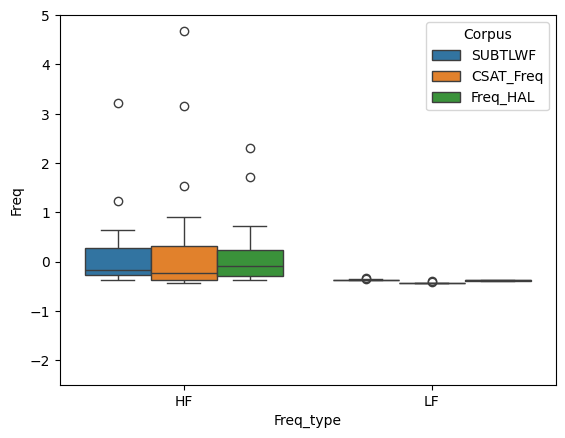

In [294]:
plot(df, HF_df, LF_df)

In [174]:
pd.merge(df, HF_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.000000,0.889817
CSAT_Freq,0.889817,1.000000


In [175]:
pd.merge(df, HF_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.00000,0.97376
CSAT_Freq,0.97376,1.00000


In [176]:
pd.merge(df, HF_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,1.000000,0.781458
Freq_HAL,0.781458,1.000000


In [177]:
pd.merge(df, LF_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.000000,0.237484
CSAT_Freq,0.237484,1.000000


In [178]:
pd.merge(df, LF_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,0.367989
CSAT_Freq,0.367989,1.000000


In [179]:
pd.merge(df, LF_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,1.000000,0.316981
Freq_HAL,0.316981,1.000000


# Bangert et al.(2012)

Reaching for words and nonwords: Interactive effects of word frequency and stimulus quality on the characteristics of reaching movements

In [295]:
LF_df = pd.DataFrame(
    {
        'Word': ['adpet', 'anvil', 'apron', 'arid', 'awe',
                 'banjo', 'bean', 'beggar', 'boom', 'canon',
                 'carve', 'cavern', 'cheer', 'chore', 'comic',
                 'concede', 'coral', 'coward', 'crate', 'dense',
                 'dual',
                 'dummy', 'dune', 'dusk', 'edit', 'embark',
                 'exit', 'fare', 'float', 'flu', 'flute',
                 'gaze', 'gorge', 'grape', 'gravel', 'haste',
                 'hick', 'hibby', 'howl', 'jardon', 'jolt',
                 'lass', 'loft', 'lord', 'lust', 'magnet',
                 'march', 'mask', 'mayor', 'mentor', 'merry',
                 'mesh', 'mint', 'mule', 'munch', 'ounce', 
                 'pail', 'peach', 'plump', 'polar', 'queen',
                 'rim', 'roast',  
                 'rude', 'ruler', 'rumor', 'scoop', 'scratch',
                 'scrub', 'seam', 'servant', 'shrug', 'slab',
                 'smash', 'sock', 'spice', 'spin', 'spoil', 
                 'spoon', 'spy', 'stack', 'stink', 'stool', 
                 'thorn', 'thrill', 'torch', 'traitor', 'tramp',
                 'trout', 'uncle', 'valve', 'veil', 'vile',
                 'weave', 'weld', 'witch', 'wizard', 'wreck',
                 'zoo'
                 ]
    }
)
LF_df.shape

(99, 1)

In [296]:
HF_df = pd.DataFrame(
    {
        'Word': ['air', 'artist', 'ball', 'behind', 'bottom',
                 'carry', 'case', 'cause', 'chance', 'cheif',
                 'child', 'chruch', 'claim', 'close', 'cold',
                 'color', 'cur', 'desk', 'dinner', 'doctor',
                 'drive', 'eight', 'father', 'feel', 'feet', 
                 'film', 'final', 'fire', 'food', 'force',
                 'free', 'gas', 'girl', 'goal', 'gun',
                 'happen', 'high', 
                 'home', 'hotel', 'house', 'human', 'index',
                 'job', 'kitchen', 'labor', 'land', 'large', 
                 'later', 'less', 'letter', 'life', 'like', 
                 'long', 'loss', 'machine', 'major', 'money', 
                 'motor', 'music', 'name', 'novel', 'paid', 
                 'party', 'picture', 'piece', 'place', 'plane', 
                 'pretty', 'road', 'sea', 'ship', 'side', 
                 'sight', 'sign', 'six', 'sort', 'sound', 
                 'south', 'stage',
                 'start', 'station', 'story', 'student', 'study',     
                 'style', 'table', 'there', 'thing', 'today',
                 'top', 'total', 'view', 'voice', 'wait',
                 'well', 'wish', 'womamn', 'world', 'yellow',
                 'you'            
                 ]
    }
)
HF_df.shape

(100, 1)

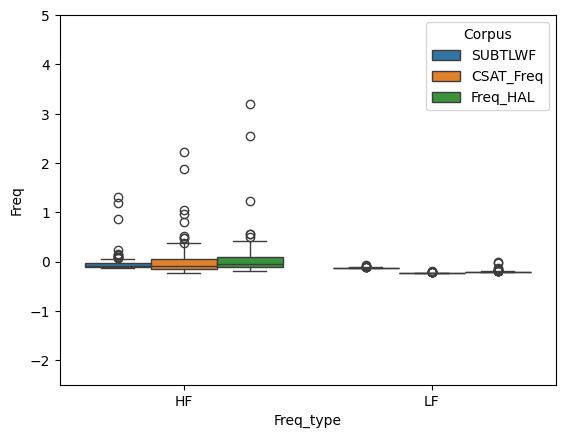

In [297]:
plot(df, HF_df, LF_df)

In [ ]:
pd.merge(df, HF_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.000000,0.984231
CSAT_Freq,0.984231,1.000000


In [ ]:
pd.merge(df, HF_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.00000,0.99071
CSAT_Freq,0.99071,1.00000


In [ ]:
pd.merge(df, HF_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,1.000000,0.979698
Freq_HAL,0.979698,1.000000


In [ ]:
pd.merge(df, LF_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.00000,0.53389
CSAT_Freq,0.53389,1.00000


In [ ]:
pd.merge(df, LF_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,0.349895
CSAT_Freq,0.349895,1.000000


In [ ]:
pd.merge(df, LF_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,1.000000,0.315069
Freq_HAL,0.315069,1.000000


# Balota et al.(2002)

The Word-Frequency Mirror Effect in Young, Old, and Early-Stage
Alzheimer’s Disease: Evidence for Two Processes in Episodic Recognition Performance

In [298]:
HF_df = pd.DataFrame(
    {
        'Word': ['car', 'rose', 'key', 'cow', 'cat', 'sun', 'cup', 'tree',
                 'road', 'home', 'ball', 'town', 'king', 'baby', 'pool', 'bear',
                 'world', 'plane', 'floor', 'book', 'field', 'hotel', 'truck', 'wheel', 
                 'radio', 'beach', 'cloud' , 'bread', 'dress', 'mouth', 'snake', 'valley',
                 'street', 'bottle', 'jacket', 'nation', 'garden', 'stream', 'market', 'engine', 
                 'college', 'library', 'picture',  'palace', 'kitchen', 'father', 'village', 'chicken' 
                 ]
    }
)
HF_df.shape

(48, 1)

In [299]:
LF_df = pd.DataFrame(
    {
        'Word': ['urn', 'boar', 'wol', 'spa', 'gem', 'keg', 'eel', 'vine',
                 'flea', 'silo', 'kily', 'harp', 'lass', 'vase', 'plum', 'loft',
                 'cobra', 'olive', 'otter', 'isle', 'valet', 'gourd', 'peacan', 'banjo',
                 'wharf', 'yacht', 'dwarf', 'tunic', 'altar', 'flask', 'anvil', 'sequin',
                 'tablet', 'tripod', 'galaxy', 'wizard', 'cavern', 'afghan', 'jaguar', 'bonnet',
                 'crevice', 'dungeon', 'parasol', 'beggar', 'monsoon', 'sleuth', 'trolley', 'vulture'
                 ]
    }
)
LF_df.shape

(48, 1)

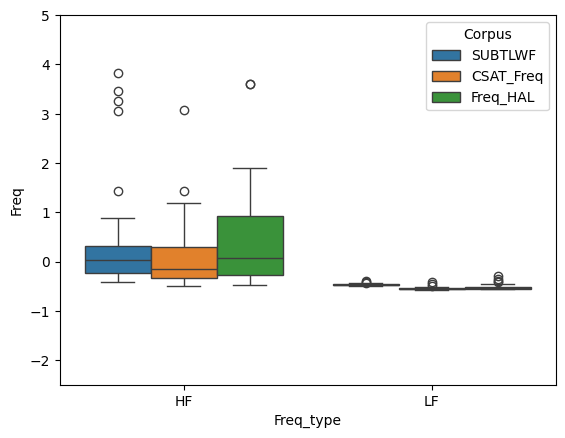

In [300]:
plot(df, HF_df, LF_df)

In [198]:
pd.merge(df, HF_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.000000,0.661543
CSAT_Freq,0.661543,1.000000


In [199]:
pd.merge(df, HF_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,0.875975
CSAT_Freq,0.875975,1.000000


In [200]:
pd.merge(df, HF_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,1.000000,0.555812
Freq_HAL,0.555812,1.000000


In [201]:
pd.merge(df, LF_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.00000,0.42076
CSAT_Freq,0.42076,1.00000


In [202]:
pd.merge(df, LF_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,0.350384
CSAT_Freq,0.350384,1.000000


In [ ]:
pd.merge(df, LF_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,1.000000,0.584759
Freq_HAL,0.584759,1.000000


# Cleland et al.(2006)

Frequency Effects in Spoken and Visual Word Recognition: Evidence From
Dual-Task Methodologies

In [301]:
HF_df = pd.DataFrame(
    {
        'Word': [ "back", "ball", "bank", "bed", "bird", "blood", "book", "box",
                 "break", "bring", "build", "call", "car", "care", "case", "chance",
                 "change", "choice", "church", "class", "club", "cost", "course", "cut",
                 "dog", "door", "draw", "drop", "face", "fact", "fear", "feed",
                 "fight", "find", "fish", "floor", "food", "foot", "force", "game",
                 "girl", "give", "glass", "group", "growth", "head", "health", "heat",
                 "hill", "home", "hope", "house", "job", "kind", "land", "laugh",
                 "lead", "learn", "leave", "life", "light", "lose", "lot", "love",
                 "man", "mass", "meet", "milk", "mouth", "name", "need", "night",
                 "note", "part", "pass", "pick", "piece", "place", "plan", "play",
                 "point", "push", "rate", "read", "rest", "rock", "room", "run",
                 "sense", "share", "shop", "sign", "sit", "skin", "sound", "source",
                 "space", "staff", "stage", "stone", "stop", "style", "talk", "teach",
                 "team", "think", "time", "town", "trade", "truth", "view", "voice",
                 "walk", "wall", "watch", "week", "wind", "wish", "work", "year"
    ]
    }
)
HF_df.shape

(120, 1)

In [302]:
LF_df = pd.DataFrame(
    {
        'Word': ["barb", "bard", "bash", "bask", "beak", "bloat", "blob", "brag", "bran",
    "bunk", "busk", "carp", "cask", "chef", "chrome", "churn", "cone", "cork",
    "cove", "crone", "cuff", "cull", "cult", "cyst", "deem", "dime", "dove",
    "farce", "fawn", "fern", "fin", "flan", "flaw", "flog", "fluke", "font",
    "frog", "fuzz", "gape", "germ", "girth", "glade", "gong", "gouge", "grid",
    "grieve", "gust", "hark", "harp", "hoax", "hoop", "hose", "hub", "jig",
    "kilt", "lark", "leer", "lint", "loathe", "lobe", "loft", "lout", "lull",
    "lunge", "lurch", "maim", "maze", "mole", "moth", "musk", "nib", "node",
    "noose", "nudge", "parch", "pave", "peep", "perk", "pew", "pike", "pod",
    "pram", "prawn", "rake", "ream", "reef", "rind", "roam", "rook", "sage",
    "scorch", "scum", "shrew", "shun", "slab", "slay", "slime", "smog", "snare",
    "spouse", "stag", "sty", "tab", "tame", "toad", "toil", "tram", "turf",
    "tusk", "vend", "vet", "void", "wade", "warp", "wart", "wasp", "wed",
    "wick", "womb", "yak"
                 ]
    }
)
LF_df.shape

(120, 1)

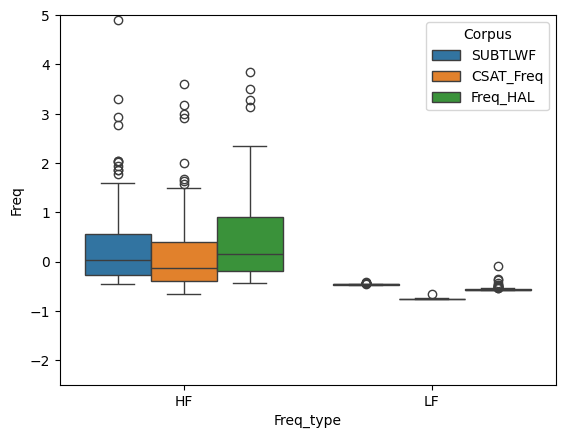

In [303]:
plot(df, HF_df, LF_df)

In [207]:
pd.merge(df, HF_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,1.000000,0.746652
CSAT_Freq,0.746652,1.000000


In [208]:
pd.merge(df, HF_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,1.000000,0.861681
CSAT_Freq,0.861681,1.000000


In [209]:
pd.merge(df, HF_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,1.000000,0.763498
Freq_HAL,0.763498,1.000000


In [210]:
pd.merge(df, LF_df, how='inner', on='Word')[['SUBTLWF', 'CSAT_Freq']].corr()

,SUBTLWF,CSAT_Freq
SUBTLWF,NaN,NaN
CSAT_Freq,NaN,NaN


In [211]:
pd.merge(df, LF_df, how='inner', on='Word')[['Freq_HAL', 'CSAT_Freq']].corr()

,Freq_HAL,CSAT_Freq
Freq_HAL,NaN,NaN
CSAT_Freq,NaN,NaN


In [212]:
pd.merge(df, LF_df, how='inner', on='Word')[['SUBTLWF', 'Freq_HAL']].corr()

,SUBTLWF,Freq_HAL
SUBTLWF,NaN,NaN
Freq_HAL,NaN,NaN
